# Community detection - based methods

Here are the testing procedures based on 500KN-Crowd.

In [1]:
import numpy as np
import graphMethods.kwextractor_methods as kwmethods
import dataset_500 as ds500

In [2]:
dataReader = ds500.DataReader()
dataReader.fetch_data()

Data loading started...
data has been loaded!


In [3]:
#[0] -- texts, dataReader.train_data[1] answers
def JaccardIndex(set1,set2):
    return len(set1.intersection(set2))/ len(set1.union(set2))


In [4]:
#Veeeeery slow, computed in advance and saved in pickle
#jinds_louvain = np.zeros(len(dataReader.train_data[0]))
#jinds_gn = np.zeros(len(dataReader.train_data[0]))
#jinds_fluid = np.zeros(len(dataReader.train_data[0])) # does not work
#jinds_kcore = np.zeros(len(dataReader.train_data[0]))

#for i in np.arange(len(jinds_louvain)):
#    print(i,"of",len(jinds_louvain))
#    jinds_louvain[i] =  JaccardIndex(set(kwmethods.LouvainExtractor(dataReader.train_data[0][i],window=3,verbose=False)),set(map(lambda x : x.lower(), dataReader.train_data[1][i])))
#    jinds_gn[i] =  JaccardIndex(set(kwmethods.GirvanNewmanExtractor(dataReader.train_data[0][i],window=3,verbose=False)),set(map(lambda x : x.lower(), dataReader.train_data[1][i])))
#    #jinds_fluid[i] =  JaccardIndex(set(kwmethods.FluidExtractor(dataReader.train_data[0][i],window=3,verbose=False)),set(dataReader.train_data[1][i]))
#    jinds_kcore[i] =  JaccardIndex(set(kwmethods.kCoreExtractor(dataReader.train_data[0][i],window=3,verbose=False)),set(map(lambda x : x.lower(), dataReader.train_data[1][i])))


In [3]:
import pickle

#with open('./jac_graph_louv.pkl','wb') as fout:
#    pickle.dump(jinds_louvain,fout)
    
#with open('./jac_graph_gn.pkl','wb') as fout:
#    pickle.dump(jinds_gn,fout)
    
#with open('./jac_graph_kcore.pkl','wb') as fout:
#    pickle.dump(jinds_kcore,fout)
    

In [4]:
jind_louvain=pickle.load(open("./jac_graph_louv.pkl","rb"))
jind_gn=pickle.load(open("./jac_graph_gn.pkl","rb"))
jind_kcore=pickle.load(open("./jac_graph_kcore.pkl","rb"))

In [5]:
print("Louvain",np.mean(jind_louvain))
print("GN",np.mean(jind_gn))
print("KCore",np.mean(jind_kcore))

Louvain 0.0701710081413
GN 0.0694415222177
KCore 0.0947949709939


In [7]:
##
guessedWords_louv = np.zeros(len(dataReader.train_data[0]))
guessedWords_gn = np.zeros(len(dataReader.train_data[0]))
guessedWords_kCore = np.zeros(len(dataReader.train_data[0]))

for i in np.arange(len(dataReader.train_data[0])):
    print(i," of 450")
    guessedWords_louv[i] = len(set(kwmethods.LouvainExtractor(dataReader.train_data[0][i],window=3,verbose=False)) & set(map(lambda x : x.lower(), dataReader.train_data[1][i]))) 
    guessedWords_gn[i] = len(set(kwmethods.GirvanNewmanExtractor(dataReader.train_data[0][i],window=3,verbose=False)) & set(map(lambda x : x.lower(), dataReader.train_data[1][i])))     
    guessedWords_kCore[i] = len(set(kwmethods.kCoreExtractor(dataReader.train_data[0][i],window=3,verbose=False)) & set(map(lambda x : x.lower(), dataReader.train_data[1][i])))     
    

0  of 450
1  of 450
2  of 450
3  of 450
4  of 450
5  of 450
6  of 450
7  of 450
8  of 450
9  of 450
10  of 450
11  of 450
12  of 450
13  of 450
14  of 450
15  of 450
16  of 450
17  of 450
18  of 450
19  of 450
20  of 450
21  of 450
22  of 450
23  of 450
24  of 450
25  of 450
26  of 450
27  of 450
28  of 450
29  of 450
30  of 450
31  of 450
32  of 450
33  of 450
34  of 450
35  of 450
36  of 450
37  of 450
38  of 450
39  of 450
40  of 450
41  of 450
42  of 450
43  of 450
44  of 450
45  of 450
46  of 450
47  of 450
48  of 450
49  of 450
50  of 450
51  of 450
52  of 450
53  of 450
54  of 450
55  of 450
56  of 450
57  of 450
58  of 450
59  of 450
60  of 450
61  of 450
62  of 450
63  of 450
64  of 450
65  of 450
66  of 450
67  of 450
68  of 450
69  of 450
70  of 450
71  of 450
72  of 450
73  of 450
74  of 450
75  of 450
76  of 450
77  of 450
78  of 450
79  of 450
80  of 450
81  of 450
82  of 450
83  of 450
84  of 450
85  of 450
86  of 450
87  of 450
88  of 450
89  of 450
90  of 450
91  of 45

In [8]:
with open('./guessed_graph_louv.pkl','wb') as fout:
    pickle.dump(guessedWords_louv,fout)
    
with open('./guessed_graph_gn.pkl','wb') as fout:
    pickle.dump(guessedWords_gn,fout)
    
with open('./guessed_graph_kcore.pkl','wb') as fout:
    pickle.dump(guessedWords_kCore,fout)
    
guessedWords_louv=pickle.load(open("./guessed_graph_louv.pkl","rb"))
guessedWords_gn=pickle.load(open("./guessed_graph_gn.pkl","rb"))
guessedWords_kСore=pickle.load(open("./guessed_graph_kcore.pkl","rb"))

In [9]:
print("Louvain",np.mean(guessedWords_louv))
print("GN",np.mean(guessedWords_gn))
print("KCore",np.mean(guessedWords_kCore))

Louvain 4.01333333333
GN 3.94444444444
KCore 6.54444444444


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
#Formatting for boxplots
jacData=np.zeros((450,3))
guessData=np.zeros((450,3))

jacData[:,0]=jind_louvain
jacData[:,1]=jind_gn
jacData[:,2]=jind_kcore

guessData[:,0]=guessedWords_louv
guessData[:,1]=guessedWords_gn
guessData[:,2]=guessedWords_kСore

labs = ["Louvain","GN","kCore"]

Text(0.5,1,'Number of guessed words')

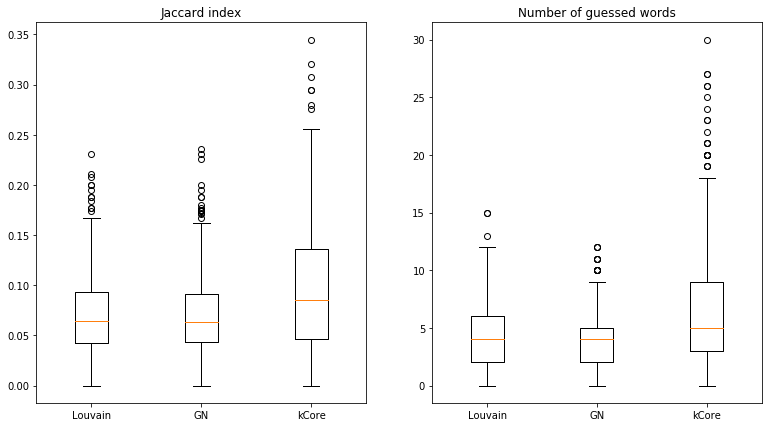

In [12]:
f, (ax1,ax2) = plt.subplots(1,2,figsize=(13,7))

ax1.boxplot(jacData,labels=labs)
ax1.set_title("Jaccard index")

ax2.boxplot(guessData,labels=labs)
ax2.set_title("Number of guessed words")

In [14]:
#Time measurements
##
import time

times_louv = np.zeros(len(dataReader.train_data[0]))
times_gn = np.zeros(len(dataReader.train_data[0]))
times_kCore = np.zeros(len(dataReader.train_data[0]))

for i in np.arange(len(dataReader.train_data[0])):
    print(i," of 450")
    time0 = time.clock()
    kwmethods.LouvainExtractor(dataReader.train_data[0][i],window=3,verbose=False)
    times_louv[i] = time.clock()-time0
    
    time0 = time.clock()
    kwmethods.GirvanNewmanExtractor(dataReader.train_data[0][i],window=3,verbose=False)
    times_gn[i] = time.clock()-time0
    
    
    time0 = time.clock()
    kwmethods.LouvainExtractor(dataReader.train_data[0][i],window=3,verbose=False)
    times_kCore[i] = time.clock()-time0
    
    
    

0  of 450
1  of 450
2  of 450
3  of 450
4  of 450
5  of 450
6  of 450
7  of 450
8  of 450
9  of 450
10  of 450
11  of 450
12  of 450
13  of 450
14  of 450
15  of 450
16  of 450
17  of 450
18  of 450
19  of 450
20  of 450
21  of 450
22  of 450
23  of 450
24  of 450
25  of 450
26  of 450
27  of 450
28  of 450
29  of 450
30  of 450
31  of 450
32  of 450
33  of 450
34  of 450
35  of 450
36  of 450
37  of 450
38  of 450
39  of 450
40  of 450
41  of 450
42  of 450
43  of 450
44  of 450
45  of 450
46  of 450
47  of 450
48  of 450
49  of 450
50  of 450
51  of 450
52  of 450
53  of 450
54  of 450
55  of 450
56  of 450
57  of 450
58  of 450
59  of 450
60  of 450
61  of 450
62  of 450
63  of 450
64  of 450
65  of 450
66  of 450
67  of 450
68  of 450
69  of 450
70  of 450
71  of 450
72  of 450
73  of 450
74  of 450
75  of 450
76  of 450
77  of 450
78  of 450
79  of 450
80  of 450
81  of 450
82  of 450
83  of 450
84  of 450
85  of 450
86  of 450
87  of 450
88  of 450
89  of 450
90  of 450
91  of 45

KeyboardInterrupt: 